In [1]:
import os
import pickle

# Run local alignment and save the scores from matching pairs
!python local_PEbA.py
!python local_MATRIX.py

# Get list of scores
with open("peba_scores", "rb") as fp:
    peba_scores = pickle.load(fp)
os.remove("peba_scores")

with open("blosum_scores", "rb") as fp:
    blosum_scores = pickle.load(fp)
os.remove("blosum_scores")


2023-03-28 11:45:41.382004: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 11:45:42.173387: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-28 11:45:42.173435: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-28 11:45:42.173443: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

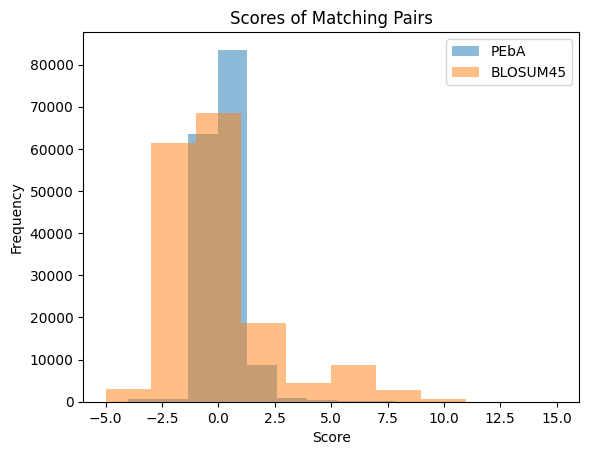

In [20]:
import matplotlib.pyplot as plt

# Plot histogram of scores
plt.hist(peba_scores, bins=10, alpha=0.5, label='PEbA')
plt.hist(blosum_scores, bins=10, alpha=0.5, label='BLOSUM45')
plt.legend(loc='upper right')
plt.title("Scores of Matching Pairs")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Sequences below were 1ad3_A and 1uzb_A (RV11, BB11003)
# First three residues from PEbA used BLOSUM45 scores, gopen/gext = -11/-1, cos_sim *= 10
# PEbA alignment had a PRA of 90.12% for the reference, used cosine similarity score for every residue
# BLOSUM45 alignment had a PRA of 56.94% for the reference

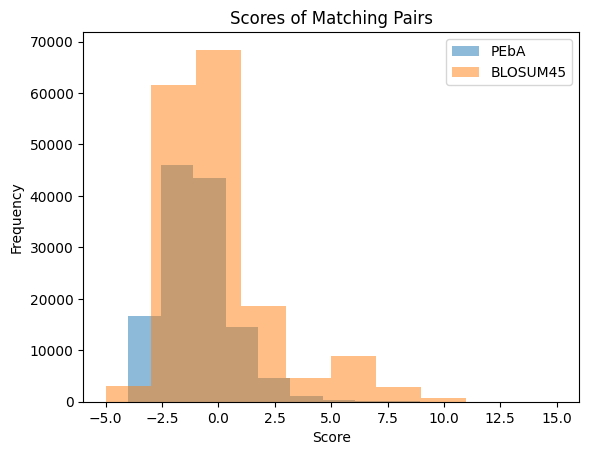

In [2]:
import matplotlib.pyplot as plt

# Plot histogram of scores
plt.hist(peba_scores, bins=10, alpha=0.5, label='PEbA')
plt.hist(blosum_scores, bins=10, alpha=0.5, label='BLOSUM45')
plt.legend(loc='upper right')
plt.title("Scores of Matching Pairs")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Sequences below were 1ad3_A and 1uzb_A (RV11, BB11003)
# First three residues from PEbA used BLOSUM45 scores, gopen/gext = -11/-1, cos_sim = (math.sqrt(abs(cos_sim))*15)-4
# PEbA alignment had a PRA of 90.59% for the reference, used cosine similarity score for every residue
# BLOSUM45 alignment had a PRA of 56.94% for the reference